In [14]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Netflix Data Analysis

This notebook explores a dataset of Netflix movies and TV shows to uncover insights into content trends, including:
- The ratio of movies to TV shows.
- The distribution of ratings for each content type.
- Top actors in both movies and TV shows.
- The countries with the highest content production.

Read the data and showing first coloums

In [16]:
data=pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
data.shape


(8807, 12)

In [18]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
data.fillna({'cast': "Unknown", 'director': "Unknown",'country':"Unknown"}, inplace=True)
# removing Nan value to unkown

In [21]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
data['cast'].str.split()


0                                               [Unknown]
1       [Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,...
2       [Sami, Bouajila,, Tracy, Gotoas,, Samuel, Jouy...
3                                               [Unknown]
4       [Mayur, More,, Jitendra, Kumar,, Ranjan, Raj,,...
                              ...                        
8802    [Mark, Ruffalo,, Jake, Gyllenhaal,, Robert, Do...
8803                                            [Unknown]
8804    [Jesse, Eisenberg,, Woody, Harrelson,, Emma, S...
8805    [Tim, Allen,, Courteney, Cox,, Chevy, Chase,, ...
8806    [Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ...
Name: cast, Length: 8807, dtype: object

In [23]:
data['cast_list']=data['cast'].str.split()

In [24]:
data['cast_list'].explode

<bound method Series.explode of 0                                               [Unknown]
1       [Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,...
2       [Sami, Bouajila,, Tracy, Gotoas,, Samuel, Jouy...
3                                               [Unknown]
4       [Mayur, More,, Jitendra, Kumar,, Ranjan, Raj,,...
                              ...                        
8802    [Mark, Ruffalo,, Jake, Gyllenhaal,, Robert, Do...
8803                                            [Unknown]
8804    [Jesse, Eisenberg,, Woody, Harrelson,, Emma, S...
8805    [Tim, Allen,, Courteney, Cox,, Chevy, Chase,, ...
8806    [Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ...
Name: cast_list, Length: 8807, dtype: object>

In [25]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Unknown]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Sami, Bouajila,, Tracy, Gotoas,, Samuel, Jouy..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[Unknown]
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[Mayur, More,, Jitendra, Kumar,, Ranjan, Raj,,..."


In [26]:
data['cast']=data['cast'].str.split()
data=data.explode('cast')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Unknown]
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."


In [27]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Unknown]
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,"Rauni,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ..."
8806,s8807,Movie,Zubaan,Mozez Singh,Anita,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Shabdish,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ..."
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Vicky, Kaushal,, Sarah-Jane, Dias,, Raaghav, ..."


In [28]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Unknown]
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."


In [29]:
data.drop('cast_list', axis=1, inplace=True)

In [30]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Getting type of rating

In [31]:
rating_type=data['rating'].unique()
rating_type

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

comparison between tv show and movies

In [32]:
Movies=data[~data['rating'].str.startswith('TV',na=False)]
Movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Hudgens,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Glenn,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Breslin,",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,Rip,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Torn,",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,Kevin,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [33]:
TV=data[data['rating'].str.startswith('TV',na=False)]
TV

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Gail,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,"Rauni,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Shabdish,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [34]:
No_of_movies=Movies['title'].nunique()
No_of_movies

1710

In [35]:
No_of_TvShow=TV['title'].nunique()
No_of_TvShow

7097

In [36]:
Produce = pd.DataFrame({
    "Category": ["Movies", "TV Shows"],
    "Count": [No_of_movies, No_of_TvShow]
})


C:\Users\shiva\AppData\Local\Temp\ipykernel_13284\1737942750.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Produce,x="Category",y="Count",palette=["#ff4b5c", "#4b7bec"])


<Figure size 700x500 with 0 Axes>

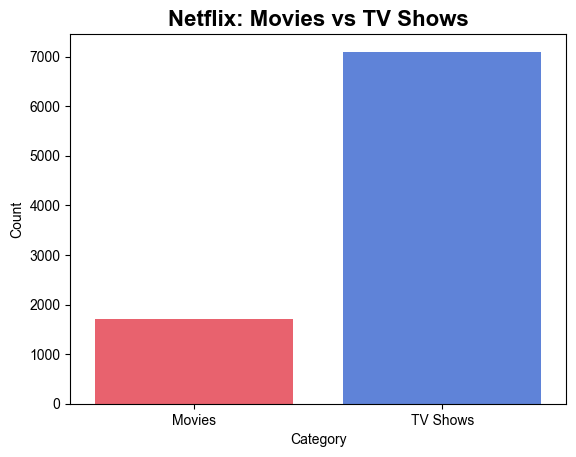

<Figure size 700x500 with 0 Axes>

In [37]:
sns.barplot(data=Produce,x="Category",y="Count",palette=["#ff4b5c", "#4b7bec"])
plt.title("Netflix: Movies vs TV Shows", fontsize=16, weight="bold")
sns.set_style("whitegrid")

# Create barplot
plt.figure(figsize=(7, 5))


We can say that netflix has added 1710 movies between year 2019 to 2021 and 7097 TV show between 2020 to 2021

Which rating of movies are mostly added my netflix?

In [38]:
Movies['rating'].nunique()

10

In [39]:
rating_only = Movies[~Movies['rating'].str.endswith('min', na=False)]

# Count all unique ratings
rating_count = rating_only['rating'].value_counts()
rating_count

rating
R        15710
PG-13     9918
PG        5761
NR         974
G          865
NC-17       59
UR          50
Name: count, dtype: int64

C:\Users\shiva\AppData\Local\Temp\ipykernel_13284\1190435135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_count,palette='pastel'   )


Text(0, 0.5, 'Count')

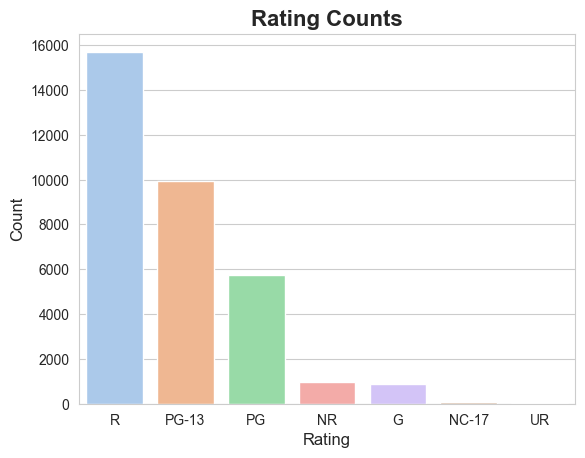

In [40]:
sns.barplot(data=rating_count,palette='pastel'   )

plt.title("Rating Counts", fontsize=16, weight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

From our analysis, R-rated movies (restricted; under 17 requires a parent, may contain sexual content, drugs, or adult language) are the most commonly added on Netflix, with 15,710 titles.
PG-13 (some material unsuitable for children under 13) comes next with 9,918 titles.
PG-rated movies (suitable for general audiences with parental guidance) number 5,761, followed by NR (Not Rated) with 974 titles.
G-rated movies (suitable for all ages) are relatively few at 865 titles.
NC-17 (adults only) and UR (Unrated) titles are rare, with 59 and 50 titles respectively.
Overall, Netflix seems to focus mostly on content suitable for teens and adults (PG-13 and R), likely reflecting audience demand.

In [41]:
TV_rating_only = TV[~TV['rating'].str.endswith('min', na=False)]

# Count all unique ratings
TV_rating_count = TV_rating_only['rating'].value_counts()
TV_rating_count

rating
TV-MA       46932
TV-14       30908
TV-PG       10041
TV-Y7        5562
TV-Y         3743
TV-G         2214
TV-Y7-FV       56
Name: count, dtype: int64

C:\Users\shiva\AppData\Local\Temp\ipykernel_13284\1067704514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=TV_rating_count,palette='pastel'   )


Text(0, 0.5, 'Count')

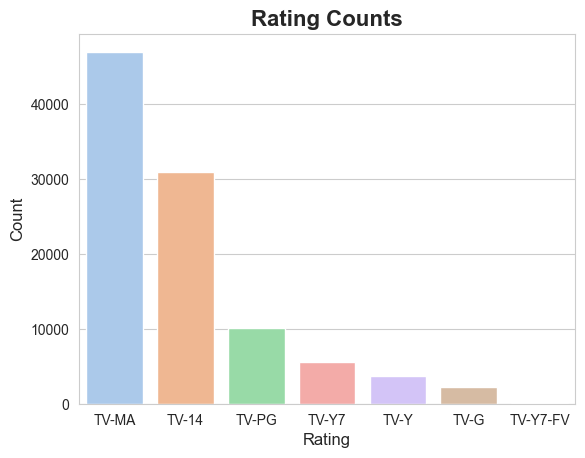

In [42]:
sns.barplot(data=TV_rating_count,palette='pastel'   )

plt.title("Rating Counts", fontsize=16, weight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

From our analysis, TV-MA rated shows (mature audience only; contains explicit language, violence, or sexual content) are the most commonly added on Netflix, with 46,932 titles.
TV-14 rated shows (some material may be inappropriate for children under 14) come next with 30,908 titles.
TV-PG rated shows (parental guidance suggested) follow with 10,041 titles.

For children’s content, TV-Y7 (suitable for ages 7+ with mild fantasy violence) has 5,562 titles, while TV-Y (safe for all kids) has 3,743 titles.
TV-G rated shows (general audience, safe for everyone) are relatively few at 2,214 titles, and TV-Y7-FV (fantasy violence-focused kids’ shows) are extremely rare with only 56 titles.

Overall, Netflix heavily focuses on mature and teen-oriented content (TV-MA and TV-14 together make up around 80% of shows), indicating a strategy targeted more towards young adults and adults rather than kids and family audiences.

In [43]:
Movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Hudgens,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Glenn,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Breslin,",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,Rip,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Torn,",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,Kevin,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [44]:
Movies['cast'].nunique()

10814

In [45]:
Top_actor=Movies['cast'].value_counts().head(5)

In [46]:
Top_actor

cast
Michael    337
John       280
David      201
James      184
Paul       134
Name: count, dtype: int64

In [47]:
Top_actor_df=Top_actor.reset_index()
Top_actor_df.columns=['actor','count']
Top_actor_df

,actor,count
0,Michael,337
1,John,280
2,David,201
3,James,184
4,Paul,134


In [48]:
total_films = 10184
Top_actor_df['percentage']=(Top_actor_df['count'] / total_films) * 100

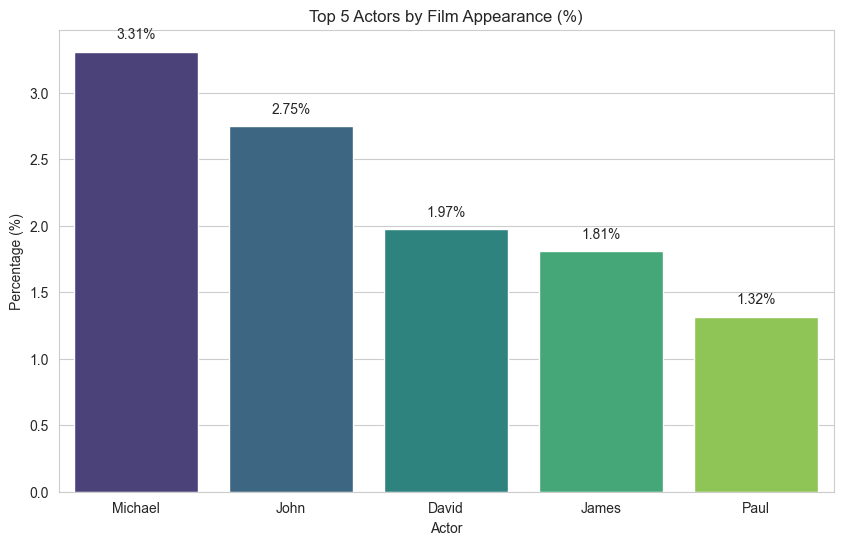

In [49]:
plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=Top_actor_df,
    x='actor',
    y='percentage',
    hue='actor',       # for different colors
    dodge=False,
    legend=False,
    palette="viridis"
)

# Add percentage labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # x position (center of bar)
        p.get_height() + 0.1,            # y position (slightly above bar)
        f"{p.get_height():.2f}%",        # text (percentage)
        ha='center'
    )
plt.xlabel("Actor")
plt.ylabel("Percentage (%)")
plt.title("Top 5 Actors by Film Appearance (%)")
plt.show()


From the analysis of the dataset, it is observed that Michael has the highest share of film appearances, accounting for 3.31% of the total, making him the most frequent actor. John follows with 2.75%, while David (1.97%), James (1.81%), and Paul (1.32%) contribute comparatively lower shares. Together, these top five actors make up around 11% of the total appearances, indicating that although some actors appear more frequently than others, the overall dataset is highly diverse, with the majority of appearances distributed among a large number of other actors.

Actor domination in TV

In [50]:
Total_drama=TV['cast'].nunique()

In [51]:
Top_actor_Tv = TV['cast'][TV['cast'] != 'Unknown'].value_counts().head(5)
Top_actor_Tv


cast
David      340
Michael    306
John       262
Kim        248
Khan,      225
Name: count, dtype: int64

In [52]:
Top_actor_d=Top_actor_Tv.reset_index()
Top_actor_d.columns=['actor','count']
Top_actor_d

,actor,count
0,David,340
1,Michael,306
2,John,262
3,Kim,248
4,"Khan,",225


In [53]:
Top_actor_d['percentage']=(Top_actor_d['count'] / Total_drama) * 100

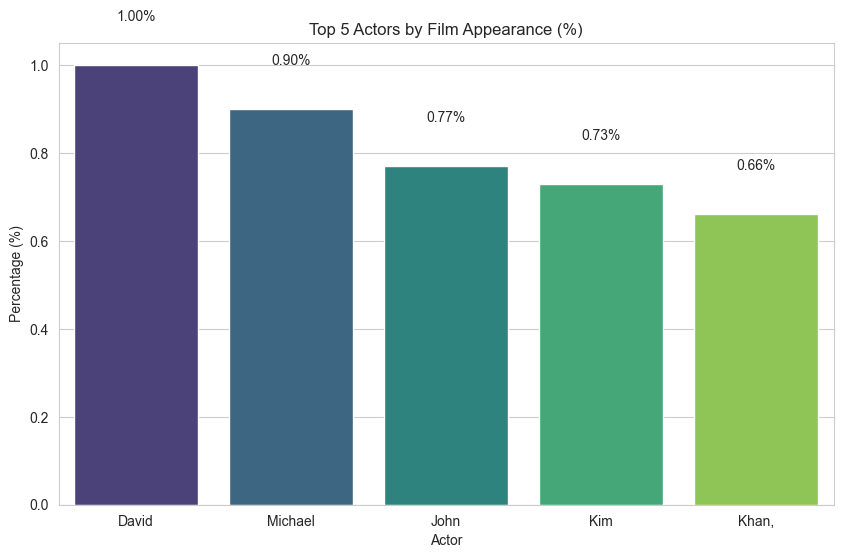

In [54]:
plt.figure(figsize=(10,6))
ax=sns.barplot(
    data=Top_actor_d,
    x='actor',
    y='percentage',
    hue='actor',       # for different colors
    dodge=False,
    legend=False,
    palette="viridis"
)

# Add percentage labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # x position (center of bar)
        p.get_height() + 0.1,            # y position (slightly above bar)
        f"{p.get_height():.2f}%",        # text (percentage)
        ha='center'
    )
plt.xlabel("Actor")
plt.ylabel("Percentage (%)")
plt.title("Top 5 Actors by Film Appearance (%)")
plt.show()


The bar chart highlights the Top 5 actors who frequently appear in TV shows (or films, depending on dataset context). Among them, David dominates with 1.00% appearance share, making him the most frequent actor in the dataset. Following him, Michael comes second with 0.90%, and then John (0.77%), Kim (0.73%), and Khan (0.66%) round out the top five.

The overall difference between the top actor (David) and the fifth actor (Khan) is just 0.34%, showing that appearances are fairly distributed among these actors, but David still maintains a slight edge.

In [55]:
Movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Hudgens,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko,Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Glenn,",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [56]:
Movies['country'].value_counts()

country
United States                                                                                               18991
United Kingdom, United States                                                                                1063
United Kingdom                                                                                                828
United States, Canada                                                                                         644
United States, United Kingdom                                                                                 588
                                                                                                            ...  
China, South Korea, United States                                                                               1
Australia, United Kingdom, United States, New Zealand, Italy, France                                            1
Sweden, United Kingdom, Finland                                                 

In [57]:
movies_df=Movies[['show_id','title','country']]

In [58]:
movies_df = movies_df.assign(country=movies_df['country'].str.split(', ')).explode('country')
movies_df = movies_df[movies_df['country'] != 'Unknown'].reset_index(drop=True)


In [59]:
# Count unique movies per country (use show_id to avoid double-counting)
country_counts = movies_df.groupby('country')['show_id'].nunique().sort_values(ascending=False)



In [60]:
top_10 = country_counts.head(10)
other_sum = country_counts[10:].sum()

# Add 'Other' category
top_10['Other'] = other_sum


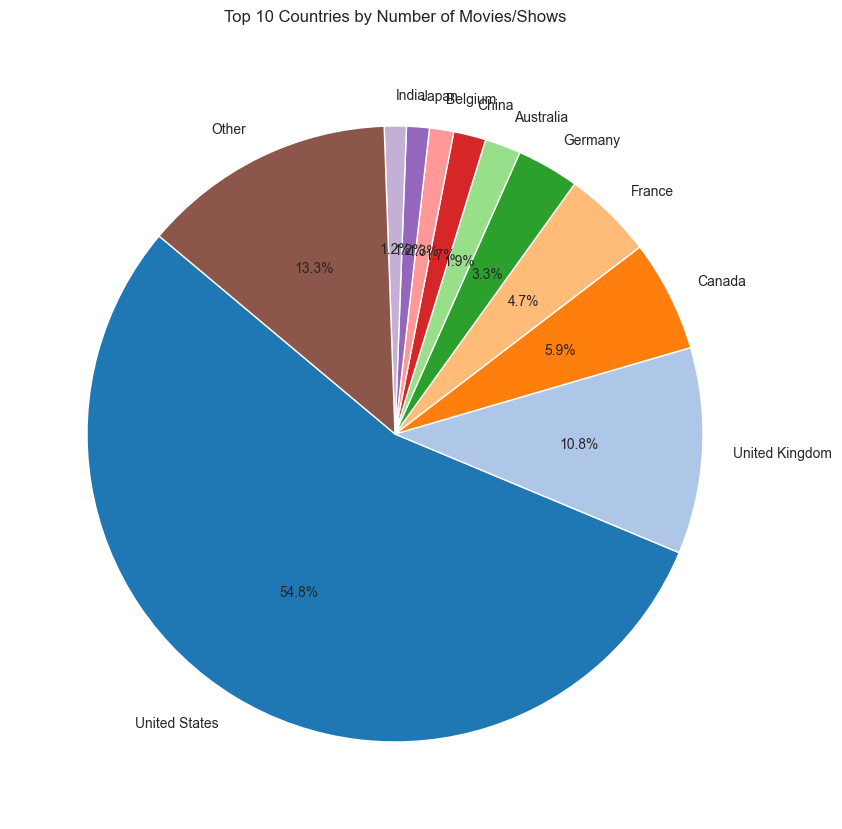

In [61]:

plt.figure(figsize=(10,10))
plt.pie(
    top_10, 
    labels=top_10.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors, 
    labeldistance=1.1  # push labels outside
)
plt.title('Top 10 Countries by Number of Movies/Shows', pad=20)
plt.show()


the analysis shows a significant concentration of movie and show production, with the United States dominating the industry at 54.8% of the total content. The United Kingdom is a distant second, contributing 10.8%, followed by Canada (5.9%) and France (4.7%). The remaining countries in the top 10—Germany, Australia, China, Belgium, India, and Japan—each account for a smaller percentage of the content, while an "Other" category makes up a notable 13.3%. This breakdown clearly illustrates that while a few countries are the primary global content producers, a significant portion of the total is also created across a diverse range of other nations.

In [62]:
TV_df=TV[['show_id','title','country']]
TV_df = TV_df.assign(country=TV_df['country'].str.split(', ')).explode('country')
TV_df = TV_df[TV_df['country'] != 'Unknown'].reset_index(drop=True)

In [63]:
country_counts = TV_df.groupby('country')['show_id'].nunique().sort_values(ascending=False)


In [64]:
top_10 = country_counts.head(10)
other_sum = country_counts[10:].sum()

# Add 'Other' category
top_10['Other'] = other_sum


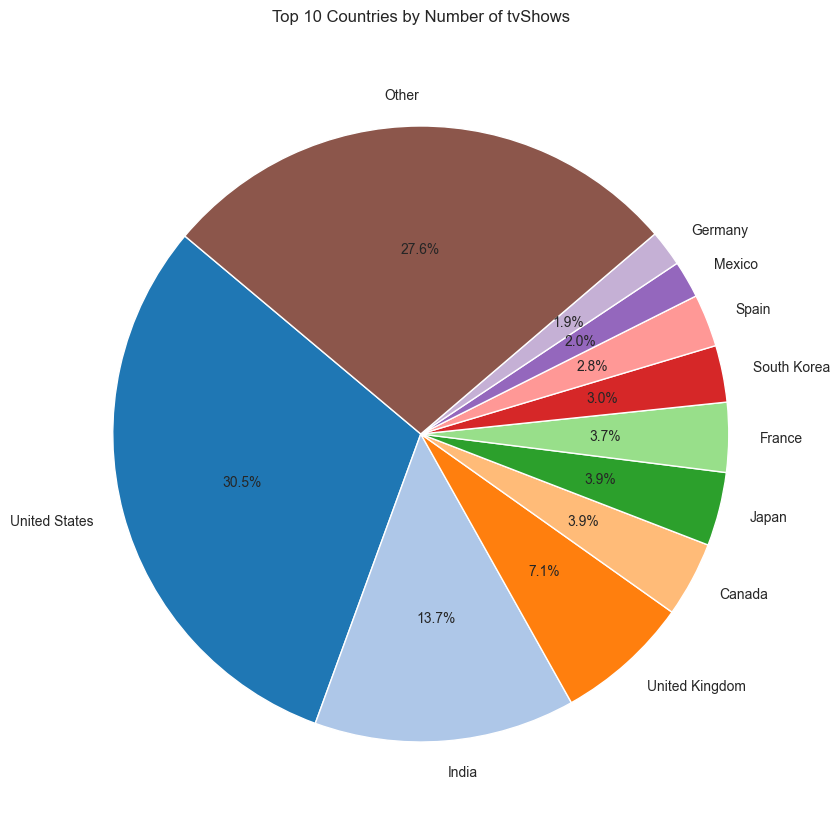

In [65]:

plt.figure(figsize=(10,10))
plt.pie(
    top_10, 
    labels=top_10.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors, 
    labeldistance=1.1  # push labels outside
)
plt.title('Top 10 Countries by Number of tvShows', pad=20)
plt.show()

Based on the provided pie chart, the analysis shows a more diverse global content landscape than the previous chart. While the United States remains the top producer, its share has dropped to 30.5%, while India has emerged as a major player, contributing 13.7% of the content, a position that aligns with its high volume of film production. The "Other" category's large share of 27.6% also indicates a broader distribution of content creation across many nations. This data, when compared to general film production trends, highlights that the sheer volume of movies and shows from prolific industries like India significantly impacts the overall distribution, even if they don't always achieve the global box office dominance of U.S. productions.

Movies vs tv_show
The two charts highlight a significant difference in the global production landscape for movies versus TV shows. The first chart, representing movies, shows a highly consolidated market dominated by the United States (54.8%) and the United Kingdom (10.8%), indicating their lead in producing and distributing films globally. In stark contrast, the second chart, representing TV shows, reveals a much more fragmented and high-volume industry. The U.S. share drops to 30.5%, while India emerges as a major player at 13.7%, reflecting its massive domestic television and streaming market. The significantly larger "Other" category in the TV shows chart (27.6%) further emphasizes this decentralization, as a greater number of countries produce a large volume of content primarily for their own audiences, a trend that is less apparent in the more globally-focused movie industry.

In [66]:
data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,"Rauni,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Shabdish,",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [67]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Qamata,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,"Ngema,",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [68]:
# now we can do with listed in category we have to split listed in and also have to take group result of which country have which type of taste


In [69]:
category = Movies[['show_id', 'title', 'country', 'listed_in']]
category.head()

,show_id,title,country,listed_in
0,s1,Dick Johnson Is Dead,United States,Documentaries
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies


In [70]:
category['listed_in']=category['listed_in'].str.split(',')
category=category.explode('listed_in')
category.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_13284\985543559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['listed_in']=category['listed_in'].str.split(',')


,show_id,title,country,listed_in
0,s1,Dick Johnson Is Dead,United States,Documentaries
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies
6,s7,My Little Pony: A New Generation,Unknown,Children & Family Movies


In [71]:
category['listed_in'].unique()

array(['Documentaries', 'Children & Family Movies', 'Comedies', ' Dramas',
       'Horror Movies', ' Sci-Fi & Fantasy', 'Thrillers',
       'Action & Adventure', ' Classic Movies', 'Dramas',
       ' Horror Movies', ' Thrillers', ' Sports Movies', ' Comedies',
       ' Romantic Movies', ' International Movies', ' Cult Movies',
       'Classic Movies', ' Music & Musicals', ' Children & Family Movies',
       ' Faith & Spirituality', ' LGBTQ Movies', ' Independent Movies',
       'Stand-Up Comedy', 'Cult Movies', 'Independent Movies',
       'Sci-Fi & Fantasy', 'Music & Musicals', 'LGBTQ Movies',
       'Anime Features', ' Anime Features', ' Documentaries', 'Movies',
       'International Movies', 'TV Shows', 'International TV Shows',
       ' Romantic TV Shows', ' Spanish-Language TV Shows', 'Anime Series',
       ' International TV Shows', "Kids' TV", ' TV Comedies',
       ' TV Dramas', ' TV Thrillers', 'British TV Shows',
       'TV Action & Adventure', ' TV Sci-Fi & Fantasy', 'Docus

In [72]:
fre=category['listed_in'].value_counts().iloc[15:]
sum=fre.sum()
sum

np.int64(6439)

In [73]:
fre_df=fre.reset_index()

In [74]:
fre_df.columns=['listed_in','count']
fre_df

,listed_in,count
0,Cult Movies,1009
1,Classic Movies,855
2,Thrillers,721
3,Classic Movies,575
4,Children & Family Movies,537
5,Documentaries,427
6,LGBTQ Movies,427
7,Faith & Spirituality,424
8,Cult Movies,229
9,Independent Movies,147


In [75]:
Top_cat=pd.DataFrame(fre_df.head(15))

In [76]:
other_df=pd.DataFrame({
    'listed_in':['other'],
    'count':[sum]
})

In [77]:
main_df=pd.concat([Top_cat,other_df])

In [78]:
main_df

,listed_in,count
0,Cult Movies,1009
1,Classic Movies,855
2,Thrillers,721
3,Classic Movies,575
4,Children & Family Movies,537
5,Documentaries,427
6,LGBTQ Movies,427
7,Faith & Spirituality,424
8,Cult Movies,229
9,Independent Movies,147


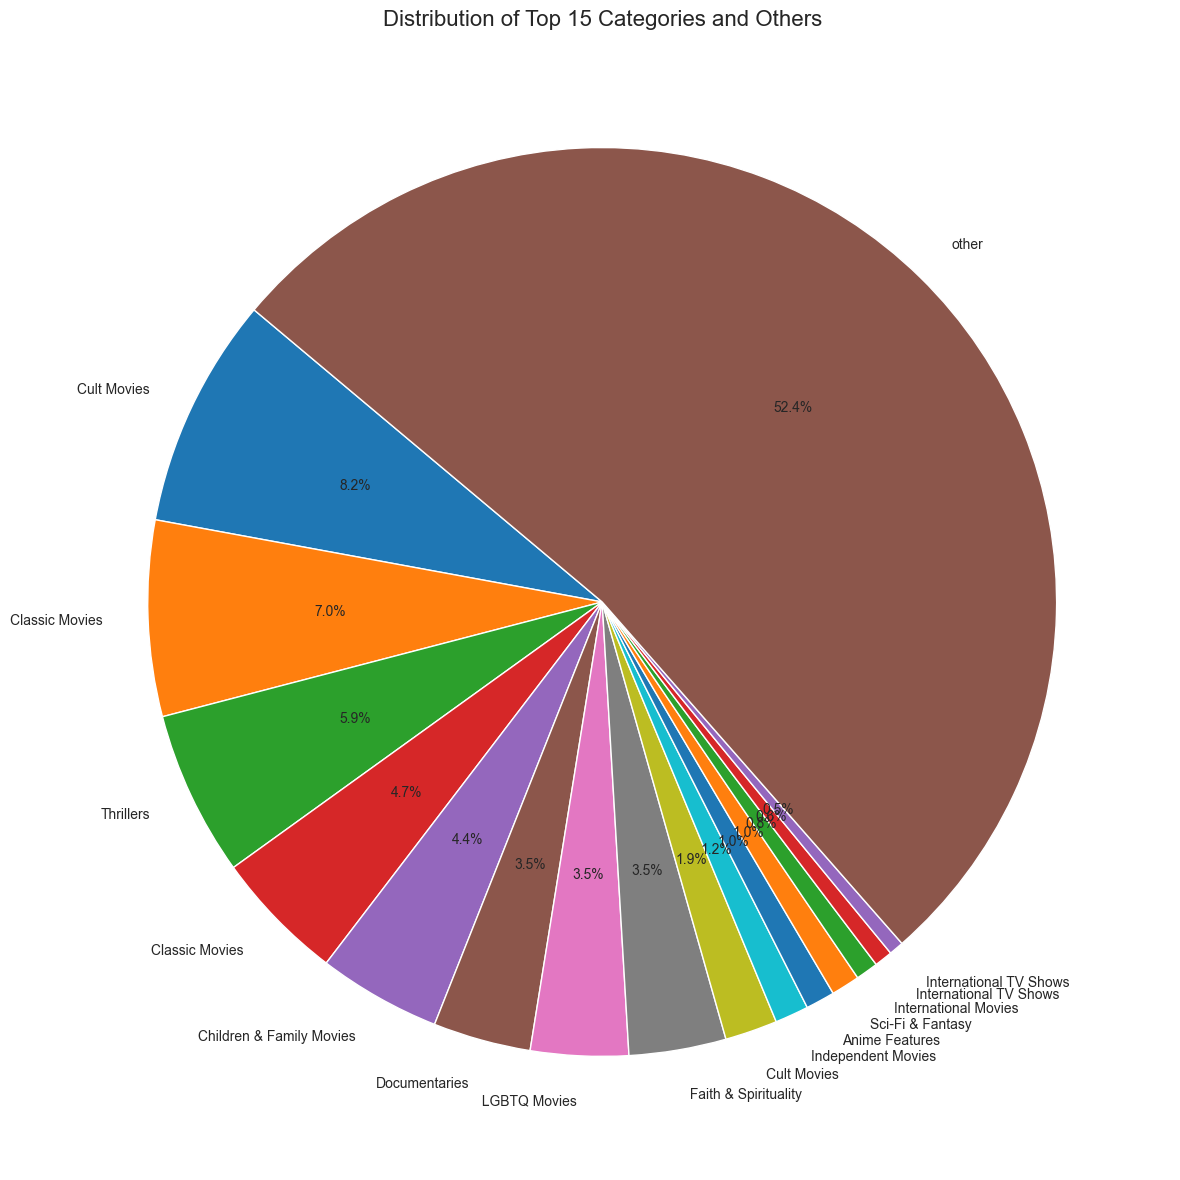

In [79]:
plt.figure(figsize=(12, 12))  # Set the figure size for better readability
plt.pie(
main_df['count'], 
    labels=main_df['listed_in'], 
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=140)
plt.title('Distribution of Top 15 Categories and Others', fontsize=16)

# The ylabel is unnecessary for a pie chart as the labels on the slices suffice
plt.ylabel('') 
plt.tight_layout() # Adjusts plot parameters for a tight layout

# Save the plot to a file
plt.savefig('category_pie_chart.png')

The pie chart shows a highly skewed content distribution, with the "Other" category dominating at an overwhelming 52.4% of the total count. This indicates that more than half of the content comes from a long tail of numerous, less-frequent categories. Among the top individual genres, Cult Movies (8.2%), Classic Movies (7.0%), and Thrillers (5.9%) are the most significant, but their proportions, along with the many other small slices, confirm that content is widely scattered rather than being concentrated in a few major categories.

In [80]:
category_TV = TV[['show_id', 'title', 'country', 'listed_in']]
category_TV.head()

,show_id,title,country,listed_in
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,Blood & Water,South Africa,"International TV Shows, TV Dramas, TV Mysteries"


In [81]:
category_TV['listed_in']=category_TV['listed_in'].str.split(',')
category_TV=category_TV.explode('listed_in')
category_TV.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_13284\3167254647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_TV['listed_in']=category_TV['listed_in'].str.split(',')


,show_id,title,country,listed_in
1,s2,Blood & Water,South Africa,International TV Shows
1,s2,Blood & Water,South Africa,TV Dramas
1,s2,Blood & Water,South Africa,TV Mysteries
1,s2,Blood & Water,South Africa,International TV Shows
1,s2,Blood & Water,South Africa,TV Dramas


In [82]:
fre_Tv=category_TV['listed_in'].value_counts().iloc[15:]
sum_TV=fre_Tv.sum()
sum_TV


np.int64(65329)

In [83]:
fre_df_TV=fre_Tv.reset_index()

In [84]:
Top_cat_TV=pd.DataFrame(fre_df_TV.head(15))

In [85]:
other_df_TV=pd.DataFrame({
    'listed_in':['other'],
    'count':[sum_TV]
})

In [86]:
main_df_TV=pd.concat([Top_cat_TV,other_df_TV])
main_df_TV

,listed_in,count
0,Romantic TV Shows,5301
1,Comedies,4240
2,Anime Series,4212
3,Spanish-Language TV Shows,3818
4,Music & Musicals,3617
5,Horror Movies,2833
6,British TV Shows,2795
7,TV Action & Adventure,2739
8,TV Comedies,2334
9,Documentaries,2300


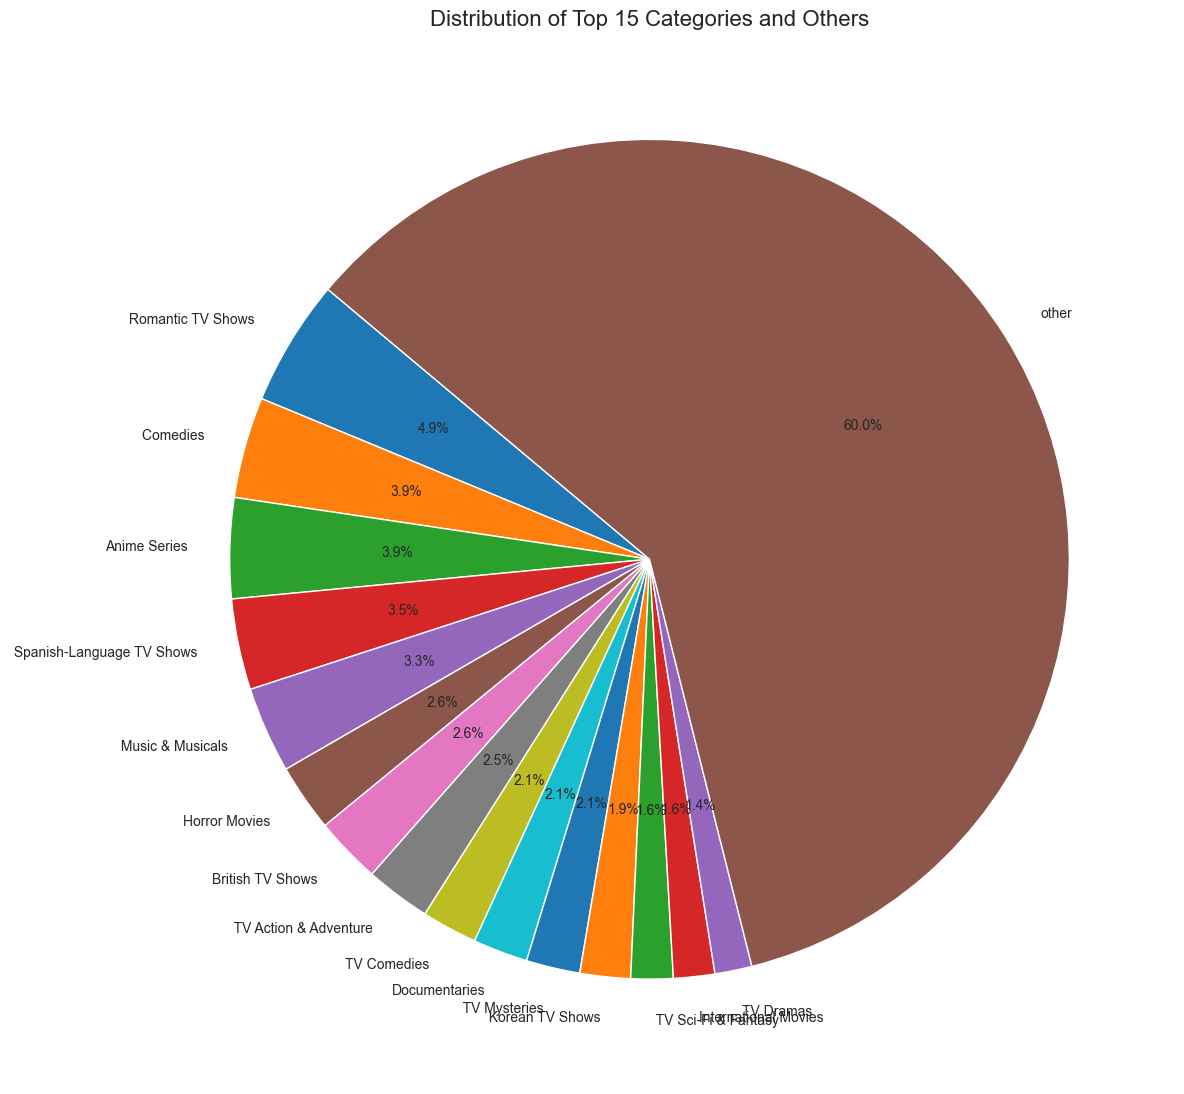

In [87]:
plt.figure(figsize=(12, 12))  # Set the figure size for better readability
plt.pie(
main_df_TV['count'], 
    labels=main_df_TV['listed_in'], 
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=140)
plt.title('Distribution of Top 15 Categories and Others', fontsize=16)

# The ylabel is unnecessary for a pie chart as the labels on the slices suffice
plt.ylabel('') 
plt.tight_layout() # Adjusts plot parameters for a tight layout

# Save the plot to a file
plt.savefig('category_pie_chart.png')

This pie chart illustrates an extremely fragmented content library, as the "Other" category accounts for a dominant 60.0% of the total, proving that more than half of the content belongs to a multitude of less-frequent genres. The top individual categories themselves are relatively small, with Romantic TV Shows (4.9%) being the largest, followed by Comedies (3.9%) and Anime Series (3.9%). This distribution confirms that popularity is not concentrated in a few major genres, but rather is highly scattered across a diverse and extensive long tail of specialized content.

The two pie charts reveal a stark difference in content distribution: while the first chart shows a library where popularity is concentrated in a few major genres like Action & Adventure, Dramas, and Comedies, the second chart depicts an extremely fragmented library with no dominant genres. This distinction is most evident in the size of the "Other" category, which is a minor 9.4% in the first chart, but an overwhelming 60.0% in the second, indicating that more than half of its content comes from a long tail of numerous, small, and specialized categories.

In [88]:
# 1️⃣ Start with only the columns you care about
df3 = Movies[['show_id', 'country', 'listed_in']].copy()

# 2️⃣ Split both country and genre into lists
df3['country'] = df3['country'].str.split(',')
df3['genre']   = df3['listed_in'].str.split(',')

# 3️⃣ Explode to one row per country–genre pair
df_long = (
    df3
    .explode('country')
    .explode('genre')
    .dropna(subset=['country','genre'])
)

# 4️⃣ Clean up spaces
df_long['country'] = df_long['country'].str.strip()
df_long['genre']   = df_long['genre'].str.strip()

# Now df_long has exactly:
# show_id | country | genre


In [92]:
genre_country = (
    df_long
    .groupby(['country','genre'])['show_id']
    .count()
    .reset_index()
)


In [93]:
heat_df = genre_country.pivot(index='country',
                              columns='genre',
                              values='show_id').fillna(0)

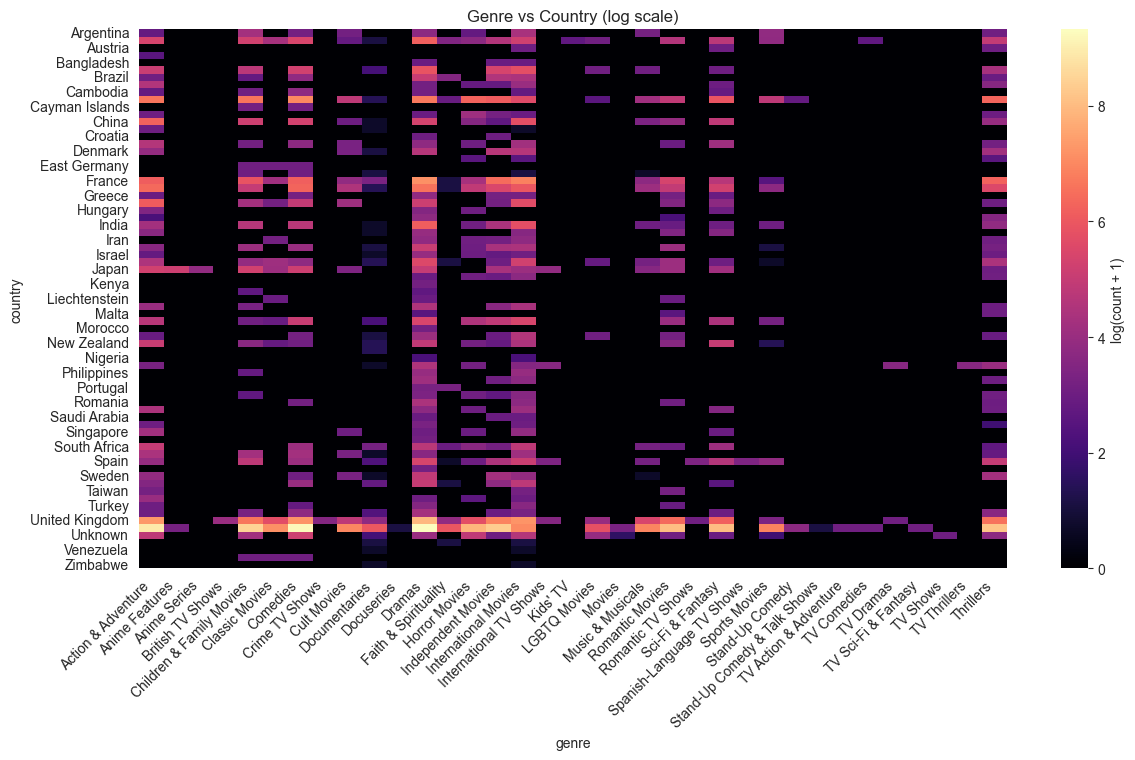

In [95]:
plt.figure(figsize=(14,7))
sns.heatmap(
    np.log1p(heat_df),   # log1p handles zeros safely
    cmap="magma",
    cbar_kws={'label': 'log(count + 1)'}
)
plt.xticks(rotation=45, ha='right')
plt.title("Genre vs Country (log scale)")
plt.show()

<Axes: xlabel='genre', ylabel='country'>

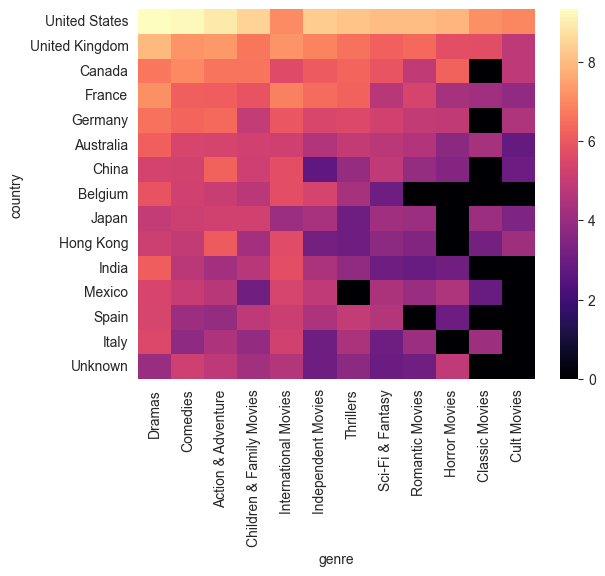

In [96]:
top_countries = heat_df.sum(axis=1).nlargest(15).index
top_genres    = heat_df.sum(axis=0).nlargest(12).index
sns.heatmap(np.log1p(heat_df.loc[top_countries, top_genres]), cmap="magma")


<Axes: xlabel='genre', ylabel='country'>

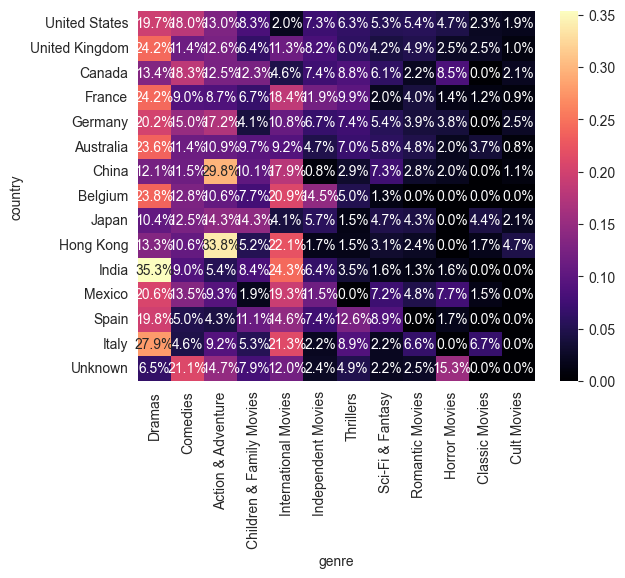

In [98]:
share = heat_df.div(heat_df.sum(axis=1), axis=0)
sns.heatmap(share.loc[top_countries, top_genres], cmap="magma", annot=True, fmt=".1%")


## 🌍 Country–Genre Insights from the Heatmaps

### 1️⃣ Overall Trends  
- **Dramas & Comedies dominate** almost everywhere.  
- The **United States** leads in total titles across nearly every genre, followed by the **United Kingdom** and **Canada**.  
- Smaller markets (e.g., Liechtenstein, Malta) show up faintly—Netflix presence is minimal.

### 2️⃣ Country-Specific Tastes  
- **Japan & South Korea** show strong color in *Anime Features/Series*, reflecting local industry strength.  
- **India** leans toward *International Movies*, *Romantic Movies*, and *Action & Adventure*.  
- **European countries** (France, Germany, Spain) have balanced representation, but relatively higher in *Independent* and *Classic Movies*.

### 3️⃣ Genre Highlights  
- *Documentaries* and *International Movies* have broad global distribution—bright streaks across many countries.  
- *Cult Movies* and *Classic Movies* remain niche, visible only in a few key markets.  
- *Sci-Fi & Fantasy* pops for the US, UK, and Canada more than elsewhere.

### 4️⃣ Big vs. Small View (Comparing the Two Heatmaps)  
- **Log-scale heatmap** (the larger one) uncovers subtle patterns in small-volume countries that the raw-count map hides.  
- The **filtered top-countries heatmap** gives a crisp look at heavy hitters, highlighting North America and Western Europe.

### 🏁 Takeaways  
Netflix’s catalogue is heavily US/UK-centric, but regional flavors—like Anime in East Asia or Romantic/International films in India—stand out when you normalise or log-scale the data.  
For a richer story, consider:
- Normalising by each country’s total titles (percent share) to reveal preference, not just catalogue size.
- Clustering countries to see “taste groups” (e.g., Asia vs. Europe vs. Americas).



At last we can conclude that :-4
Netflix's catalog is heavily US/UK-centric, but regional trends, like the popularity of Anime in East Asia and Romantic/International films in India, stand out when the data is normalized.

The analysis suggests that Netflix primarily focuses on content for teens and adults, with TV-MA and TV-14 rated shows making up a large percentage of the content.

The content creation landscape for movies and TV shows is different. While the US and UK lead in movie production, TV shows have a more fragmented market with India as a major player.